# Рекомендация тарифов

 ***Цель***
 
Построить систему, способную проанализировать поведение клиентов, и предложить пользователям новый тариф: «Смарт» или «Ультра»

 ***Задача***
 
 Построить модель для задачи классификации, которая выберет подходящий тариф.
 
 Проверить модели на вменяемость

***Ход исследования***

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы 
Нужно построить модель для задачи классификации, которая выберет подходящий тариф. 

Предобработка данных не понадобится. 

Постройте модель с максимально большим значением accuracy. Доля правильных ответов должна быть больше  0.75. 

Таким образом, исследование пройдёт в три этапа:
 1. Построение модели.
 2. Исследование качества разных моделей
 3. Проверка accuracy на тестовой выборке
 4. Проверка модели на вменяемость
 

***Описание данных***

Путь к файлу: datasets/users_behavior.csv

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. 

* сalls — количество звонков, 
* minutes — суммарная длительность звонков в минутах,
* messages — количество sms-сообщений, 
* mb_used — израсходованный интернет-трафик в Мб, 
* is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)

## Изучение данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


## Обработка даннх 

### Разделим исходные данные на обучающую, валидационную и тестовую выборки

Разделим в соотношении 60/20/20

In [3]:
df_tr_test, df_valid = train_test_split(df, test_size=0.20, random_state=12345) 
df_train, df_test = train_test_split(df_tr_test, test_size=0.25, random_state=12345) 

In [4]:
df_train.info()
df_valid.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 2656 to 510
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     1928 non-null   float64
 1   minutes   1928 non-null   float64
 2   messages  1928 non-null   float64
 3   mb_used   1928 non-null   float64
 4   is_ultra  1928 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 90.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 1415 to 1196
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     643 non-null    float64
 1   minutes   643 non-null    float64
 2   messages  643 non-null    float64
 3   mb_used   643 non-null    float64
 4   is_ultra  643 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 30.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 2699 to 1806
Data columns (total 5 columns):
 #   Column    Non-Null Coun

In [5]:
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']  

## Исследуем модели

### Построи разные модели, меняя гиперпараметры

#### Рассмотрим модель  решающее дерево

In [6]:
best_model = None
best_result = 0
for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions_valid)
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid))

max_depth = 1 : 0.7480559875583204
max_depth = 2 : 0.7838258164852255
max_depth = 3 : 0.7869362363919129
max_depth = 4 : 0.7869362363919129
max_depth = 5 : 0.7884914463452566


Наибольшее значение accuracy ( 0.7884914463452566) со значением max_depth=5

#### Модель случайный лес

In [7]:
best_model = None
best_result = 0
for est in range(1, 6):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    print(est, result)
    if result > best_result:
        best_model = model
        best_result = result

print("Accuracy наилучшей модели на валидационной выборке:", best_result)

1 0.7340590979782271
2 0.7542768273716952
3 0.7729393468118196
4 0.7667185069984448
5 0.7807153965785381
Accuracy наилучшей модели на валидационной выборке: 0.7807153965785381


Accuracy наилучшей модели на валидационной выборке: 0.7807153965785381 при параметре n_estimators=5

#### Модель логистическая регрессия

In [8]:
model = LogisticRegression(random_state=12345) 
model.fit(features_train, target_train) 
result = model.score(features_valid, target_valid)
print("Accuracy модели на валидационной выборке:", result)

Accuracy модели на валидационной выборке: 0.7589424572317263


***Наилучшее значение на моделе  случайный лес (DT)***

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Для подбора оптимальных параметров можно использовать функции Gridsearchcv или Randomizedsearchcv. Статья про разницу между ними: https://towardsdatascience.com/gridsearchcv-or-randomsearchcv-5aa4acf5348c#:~:text=RandomSearchCV%20has%20the%20same%20purpose,parameters%20to%20improve%20your%20model.&text=The%20main%20difference%20between%20the,want%20to%20sample%20and%20test. И просто очень большая статья по их применению: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/ Совсем обьемная статья с огромным количеством библиотек для подбора гиперпараметров: https://neptune.ai/blog/hyperparameter-tuning-in-python-complete-guide/. Ускоренная версия GridsearchCV https://towardsdatascience.com/20x-times-faster-grid-search-cross-validation-19ef01409b7c.
</div>


## Проверка модели на тестовой выборке

In [9]:
model_DTC = DecisionTreeClassifier(random_state=12345, max_depth=5)
model_DTC.fit(features_train, target_train)
predictions_DTC_test = model_DTC.predict(features_test)
result_DTC = accuracy_score(target_test, predictions_DTC_test)
print("Accuracy модели на тестовой выборке:", result_DTC)

Accuracy модели на тестовой выборке: 0.7589424572317263


In [10]:
model_RFC = RandomForestClassifier(random_state=12345, n_estimators=5) 
model_RFC.fit(features_train, target_train)
predictions_RFC_test = model_RFC.predict(features_test)
result_RFC = accuracy_score(target_test, predictions_RFC_test)
print("Accuracy модели на тестовой выборке:", result_RFC)

Accuracy модели на тестовой выборке: 0.7620528771384136


In [11]:
model_LR = LogisticRegression(random_state=12345) 
model_LR.fit(features_train, target_train) 
predictions_LR_test = model_LR.predict(features_test)
result_LR = model_LR.score(features_test, target_test)
print("Accuracy модели на тестовой выборке:", result_LR)

Accuracy модели на тестовой выборке: 0.7262830482115086


На тестовой выборке Accuracy модели DT составило 0.7589424572317263
При этом Accuracy модели RF на тестовой выборке составило 0.7620528771384136

## Проверка модели на адекватность

### Найдем confusion_matrix для наших моделей 

In [12]:
print('DT', confusion_matrix(predictions_DTC_test, target_test))
print('RF', confusion_matrix(predictions_RFC_test, target_test))
print('LR', confusion_matrix(predictions_LR_test, target_test))

DT [[420 132]
 [ 23  68]]
RF [[383  93]
 [ 60 107]]
LR [[430 163]
 [ 13  37]]


Заметим что 

* RF дала больше всего истенно положительных и меньше всего ложно положительных. 

* LR дала меньше ложно отрицательных и больше истенно ложных. 

* DT дала средни значения

### Найдем accuracy_score - долю выборок, правильно спрогнозированных¶

In [13]:
print('DT', accuracy_score(predictions_DTC_test, target_test))
print('RF', accuracy_score(predictions_RFC_test, target_test))
print('LR', accuracy_score(predictions_LR_test, target_test))      

DT 0.7589424572317263
RF 0.7620528771384136
LR 0.7262830482115086


***Лучший результат accuracy_score RF***

### Найдем recall_score, 
также известный как чувствительность, доля положительных событий, которые
правильно предсказали

In [14]:
print('DT', recall_score(predictions_DTC_test, target_test))
print('RF', recall_score(predictions_RFC_test, target_test))
print('LR', recall_score(predictions_LR_test, target_test))

DT 0.7472527472527473
RF 0.6407185628742516
LR 0.74


***Лучший результат recall_score у модели DT***

###  Найдем precision_score
Точность - это доля ожидаемых положительных событий, которые на самом деле являются
положительными

In [15]:
print('DT', precision_score(predictions_DTC_test, target_test))
print('RF', precision_score(predictions_RFC_test, target_test))
print('LR', precision_score(predictions_LR_test, target_test))

DT 0.34
RF 0.535
LR 0.185


***Лучший результат precision_score у модели RF***

### Найдем  f1_score
Оценка f1 является гармоническим средним значением запоминания и точности, с более высокой
оценкой в качестве лучшей модели

In [16]:
print('DT', f1_score(predictions_DTC_test, target_test))
print('RF', f1_score(predictions_RFC_test, target_test))
print('LR', f1_score(predictions_LR_test, target_test))

DT 0.46735395189003437
RF 0.5831062670299728
LR 0.296


***Лучший результат  f1_score у модели RF***

### Найдем roc_curve и roc_auc_score

Кривые ROC помогают понять баланс между истинно положительными показателями и
ложноположительными показателями
* thresholds = все уникальные вероятности предсказания в порядке убывания
* fpr = ложноположительный показатель (FP / (FP + TN)) для каждого порога
* tpr = истинная положительная скорость (TP / (TP + FN)) для каждого порога

In [17]:
fpr_RFC, tpr_RFC, thresholds_RFC = roc_curve(predictions_RFC_test, target_test)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(predictions_LR_test, target_test)
fpr_DTC, tpr_DTC, thresholds_DTC = roc_curve(predictions_DTC_test, target_test)

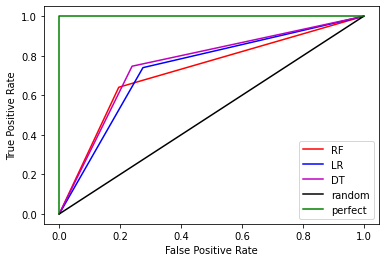

In [18]:
plt.plot(fpr_RFC, tpr_RFC,'r-',label = 'RF')
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR')
plt.plot(fpr_DTC,tpr_DTC,'m-', label= 'DT')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Модель, которая случайно угадывает метку, приведет к черной линии

ROC, который находится дальше от черной линии, лучше

Для анализа производительности мы будем использовать метрику площади под кривой.

In [19]:
auc_RFC = roc_auc_score(predictions_RFC_test, target_test)
auc_LR = roc_auc_score(predictions_LR_test, target_test)
auc_DTC = roc_auc_score(predictions_DTC_test, target_test)
print('AUC RF:%.3f'% auc_RFC)
print('AUC LR:%.3f'% auc_LR)
print('AUC DT:%.3f'% auc_DTC)

AUC RF:0.723
AUC LR:0.733
AUC DT:0.754


***Лучший вариант у roc_curve и roc_auc_score модели DT***

In [26]:
display(pd.DataFrame({ 'accuracy_score': [accuracy_score(predictions_DTC_test, target_test),
accuracy_score(predictions_RFC_test, target_test),
accuracy_score(predictions_LR_test, target_test)], 
'roc_auc_score':[auc_RFC, auc_LR, auc_DTC], 
'f1_score': [f1_score(predictions_DTC_test, target_test), f1_score(predictions_RFC_test, target_test), 
 f1_score(predictions_LR_test, target_test)], 
'precision_score': [precision_score(predictions_DTC_test, target_test),
precision_score(predictions_RFC_test, target_test),
precision_score(predictions_LR_test, target_test)],

'recall_score': [recall_score(predictions_DTC_test, target_test),
recall_score(predictions_RFC_test, target_test),
recall_score(predictions_LR_test, target_test)]}, index = ['DT', 'RF', 'LR' ], ))

,accuracy_score,roc_auc_score,f1_score,precision_score,recall_score
DT,0.758942,0.722670,0.467354,0.340,0.747253
RF,0.762053,0.732563,0.583106,0.535,0.640719
LR,0.726283,0.754061,0.296000,0.185,0.740000


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> По изначальному замыслу тут задумывалось, что ты просто построишь константную модель. Логика константной модели в следующем: это теоретическая модель, которая каждой строке присваивает один наиболее часто встречаемый класс. Т.е. в нашем случае, если модель решит, что все строки -это класс 0, то её точность будет 69.5%. Точность твоей модели (Случайный лес) на тестовой выборке 76.2%, т.е. она лучше, чем просто тыкнуть везде одинаковый класс. 
    
Для проверки константной модели ты мог бы использовать DummyClassifier() https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html strategy = 'most_frequent' или просто:
    
df['is_ultra'].value_counts() / df.shape[0]
    
Интересная статья на эту тему:
    
https://towardsdatascience.com/why-using-a-dummy-classifier-is-a-smart-move-4a55080e3549
    


</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Ты пошла дальше и рассмотрела другие метрики модели помимо точности, это здорово, что ты вышла за пределы необходимых требований. Подробная статья по метрикам и шпаргалка:
    
- https://neptune.ai/blog/evaluation-metrics-binary-classification
    
- https://github.com/neptune-ai/blog-binary-classification-metrics/blob/master/binary_classification_metrics_cheathsheet.pdf
</div>

# Вывод

* Лучший результат accuracy_score модель RF   долю выборок, правильно спрогнозированных

* Лучший результат recall_score модель  LR  доля положительных событий, которые  правильно предсказали

* Лучший результат precision_score модель RF  точность - доля ожидаемых положительных событий, которые на самом деле являются положительными 

* Лучший результат f1_score модель RF  гармоническим средним значением запоминания и точности

* Лучший результат roc_curve и roc_auc_score DT  баланс между истинно положительными показателями и ложноположительными показателями

* RF дала больше всего истенно положительных и меньше всего ложно положительных. 
* LR дала меньше ложно отрицательных и больше истенно ложных. 

***Модель DT имеет лучший Accuracy модели на валидационной выборке и лучший показатель баланса между истинно положительными показателями и ложноположительными показателями (roc_curve и roc_auc_score)***

***RF более точная модель, она подходит для получения истенных значений, т.е. для тех, кому необходимо предложить тариф "Ультра"***

***LR более "чувствительная" и больше подходит для получения ложных событий, т.е. для тех, кому необходимо предложить тариф "Смарт"***

## Чек-лист готовности проекта

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
